### Download Amharic News Dataset

In [1]:
! git clone https://github.com/IsraelAbebe/An-Amharic-News-Text-classification-Dataset.git

Cloning into 'An-Amharic-News-Text-classification-Dataset'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (34/34), 46.12 MiB | 13.92 MiB/s, done.


In [2]:
!unzip "/content/An-Amharic-News-Text-classification-Dataset/data/Amharic News Dataset.zip"

Archive:  /content/An-Amharic-News-Text-classification-Dataset/data/Amharic News Dataset.zip
  inflating: Amharic News Dataset.csv  


### Download Amharic word embeddings

In [3]:
import gdown
url = "https://drive.google.com/uc?id=1t-1eGKfBqTExQeJ22LrvLVdH_GuYMD5b&confirm=t"
output = "amharic_word2vec.vec"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1t-1eGKfBqTExQeJ22LrvLVdH_GuYMD5b&confirm=t
To: /content/amharic_word2vec.vec
100%|██████████| 873M/873M [00:13<00:00, 65.2MB/s]


'amharic_word2vec.vec'

In [4]:
embeddings = {}

with open('amharic_word2vec.vec', 'r', encoding='utf-8') as vecfile:
  for line in vecfile.readlines():
    arr = line.split()
    embeddings[arr[0]] = [float(x) for x in arr[1:]]


### Data Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df = pd.read_csv('Amharic News Dataset.csv').dropna()
df.head(10)

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012
5,‹‹ሃገራዊ ችግሮችን ለማረምና አብሮነትን ለማጠናከር ስፖርት ወሳኝ ነው››...,ስፖርት,"December 30, 2020",10,ብርሃን ፈይሳ አዲስ አበባ፡- እንደ ሃገር እየታዩ ያሉትን ስብራቶችና ች...,https://www.press.et/Ama/?p=38512
6,በውድድር ወቅት በወረርሽኙ መከላከያ መመሪያዎች አተገባበር ላይ ስጋት እን...,ስፖርት,"December 30, 2020",3,ብርሃን ፈይሳ አዲስ አበባ፡- ስፖርታዊ እንቅስቃሴና ውድድሮች በሚከናወኑበ...,https://www.press.et/Ama/?p=38515
7,ስፖርትን ከፖለቲካ የመለየት ፈተናዎች,ስፖርት,"December 31, 2020",11,ቦጋለ አበበ‹‹ስፖርትና ፖለቲካ አንድ ናቸው ወይም ጠንካራ ግንኙነት አላቸ...,https://www.press.et/Ama/?p=38578
8,የዓለም አትሌቲክስና 2020 የውድድር ዓመት,ስፖርት,"January 1, 2021",10,ቦጋለ አበበ በኮቪድ-19 ወረርሽኝ ምክንያት የዓለም ማህበራዊ፣ ፖለቲካዊና...,https://www.press.et/Ama/?p=38650
9,ለራስ ሲባል ሌላውን …,መዝናኛ,"April 27, 2020",24,ኧሯ! እንዴት ሆኖ እንዴት ሆኖ እኛንማ አይደፍርም! ብለን ነበር ደፈረን...,https://www.press.et/Ama/?p=31198


In [7]:
df.isna().sum()

headline    0
category    0
date        0
views       0
article     0
link        0
dtype: int64

In [8]:
df = df.drop_duplicates(subset=['link'], keep='first')

In [9]:
category_translation = {
    'ሀገር አቀፍ ዜና' : 'Local News', 
    'መዝናኛ' : 'Entertainment', 
    'ስፖርት' : 'Sport', 
    'ቢዝነስ' : 'Business', 
    'ዓለም አቀፍ ዜና' : 'International News', 
    'ፖለቲካ' : 'Politics'
}

df['category_eng'] = df['category'].apply(lambda x: category_translation[x])

In [10]:
df.groupby(['category', 'category_eng']).count()

,,headline,date,views,article,link
category,category_eng,,,,,
ሀገር አቀፍ ዜና,Local News,20643,20643,20643,20643,20643
መዝናኛ,Entertainment,632,632,632,632,632
ስፖርት,Sport,10400,10400,10400,10400,10400
ቢዝነስ,Business,3871,3871,3871,3871,3871
ዓለም አቀፍ ዜና,International News,5919,5919,5919,5919,5919
ፖለቲካ,Politics,9300,9300,9300,9300,9300


## **Preprocessing**

#### 1. Clean the amharic text in the articles 

In [11]:
def clean_text(text):
  # remove punctuation
  text = re.sub(r'[^\w\s]',' ', text) 
  
  # remove english letters and numbers
  text = re.sub('[A-Za-z0-9]', '', text) 

  # remove amharic numbers
  text = re.sub('[\'\u1369-\u137C\']+','', text) 

  return text

df['article_clean'] = df['article'].apply(clean_text)
df.head()

,headline,category,date,views,article,link,category_eng,article_clean
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481,Sport,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334,Entertainment,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010,Sport,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011,Sport,ብርሃን ፈይሳአዲስ አበባ የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012,Sport,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...


#### 2. Remove articles that are either too short or too long

In [12]:
def num_words(text):
  return len(text.strip().split(' '))

df['num_words'] = df['article_clean'].apply(num_words)
df.head()

,headline,category,date,views,article,link,category_eng,article_clean,num_words
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481,Sport,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,339
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334,Entertainment,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,509
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010,Sport,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,296
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011,Sport,ብርሃን ፈይሳአዲስ አበባ የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,321
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012,Sport,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,499


In [ ]:
df[['category', 'category_eng', 'num_words']].groupby(['category', 'category_eng']).mean()

,,num_words
category,category_eng,
ሀገር አቀፍ ዜና,Local News,249.127307
መዝናኛ,Entertainment,766.167722
ስፖርት,Sport,309.957500
ቢዝነስ,Business,379.029450
ዓለም አቀፍ ዜና,International News,153.704004
ፖለቲካ,Politics,320.040000


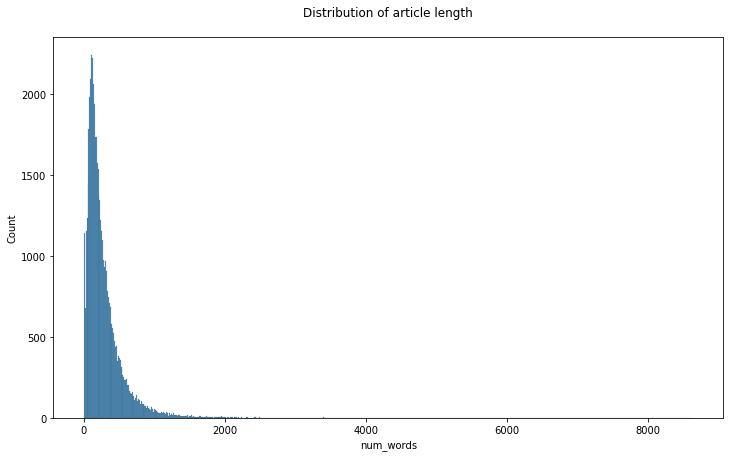

In [ ]:
fig = plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x="num_words")
ax.set_title('Distribution of article length\n');

plt.show()

In [ ]:
np.percentile(df['num_words'], 5), np.percentile(df['num_words'], 99)

(35.0, 1374.3600000000006)

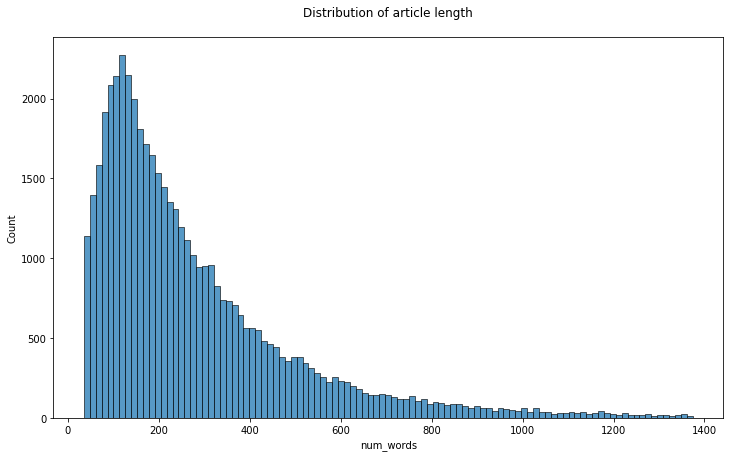

In [ ]:
df_clean = df[
  (df['num_words']>=np.percentile(df['num_words'], 5))
  & (df['num_words']<=np.percentile(df['num_words'], 99))
]

fig = plt.figure(figsize=(12,7))
ax = sns.histplot(data=df_clean, x="num_words")
ax.set_title('Distribution of article length\n');

plt.show()

In [ ]:
df_clean[['category', 'category_eng', 'article_clean']].groupby(['category', 'category_eng']).count()

,,article_clean
category,category_eng,
ሀገር አቀፍ ዜና,Local News,19333
መዝናኛ,Entertainment,577
ስፖርት,Sport,9482
ቢዝነስ,Business,3733
ዓለም አቀፍ ዜና,International News,5667
ፖለቲካ,Politics,9021


In [ ]:
df_clean = pd.concat([
    #df_clean[df_clean['category_eng']=='Local News'].sample(7500), #category is too general
    #df_clean[df_clean['category_eng']=='Entertainment'], # available data is too small
    df_clean[df_clean['category_eng']=='Sport'].sample(7500),
    df_clean[df_clean['category_eng']=='Business'],
    df_clean[df_clean['category_eng']=='International News'],
    df_clean[df_clean['category_eng']=='Politics'].sample(7500),
])

In [ ]:
df_clean[['category', 'category_eng', 'article_clean']].groupby(['category', 'category_eng']).count()

,,article_clean
category,category_eng,
ስፖርት,Sport,7500
ቢዝነስ,Business,3733
ዓለም አቀፍ ዜና,International News,5667
ፖለቲካ,Politics,7500


### 3. Encode the articles as the average of the embeddings of each word 

In [ ]:
def encode_text(text, embeddings, embedding_dim):
  vec = np.zeros((embedding_dim,))
  tokens = word_tokenize(text)
  num_vocab_words = 0.00001
  for token in tokens:
    if token in embeddings:
      vec = vec + embeddings[token]
      num_vocab_words += 1
  vec = vec/num_vocab_words
  return vec

s = 'የኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻምፒዮና በአዲስ አበባ ከተማ በመካሄድ ላይ ይገኛል'
print(s)
print(encode_text(s, embeddings, 300))

የኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻምፒዮና በአዲስ አበባ ከተማ በመካሄድ ላይ ይገኛል
[ 0.12181923 -0.2369268   0.06719361 -0.15459154 -0.11699857  0.02840873
  0.03196222 -0.02292156 -0.0221169   0.10546525 -0.34899363  0.3154314
 -0.03613639 -0.20502316  0.01394316 -0.01552815  0.09217551  0.01931732
 -0.10516625 -0.06044278 -0.29014584 -0.08205326  0.00508558 -0.1561927
  0.11329582 -0.05494737  0.11992823  0.18808009 -0.00692916 -0.06733978
 -0.05372404 -0.16988528  0.18160968 -0.07170894 -0.06666053 -0.04571105
  0.09964758 -0.04105355  0.30605691  0.02418506  0.18315843 -0.08760884
 -0.12923531 -0.07408227  0.18912043  0.09001384 -0.22244673 -0.0585757
  0.06687078 -0.30875849  0.01213057  0.03911913  0.07043986 -0.03362914
  0.07478352 -0.16961803 -0.14723829  0.15394587 -0.01036457  0.00788733
 -0.12271373  0.26012087 -0.14567071 -0.09878267 -0.06365511 -0.00786641
 -0.06635836  0.03383206  0.01663657  0.26445828  0.04822546 -0.05123054
  0.06667036 -0.19906333 -0.32815956  0.08670493  0.01928

In [ ]:
categories = sorted(set(df_clean['category_eng']))
print(categories)

X = np.array([encode_text(text, embeddings, 300) for text in df_clean['article']])
y = np.array([categories.index(c) for c in df_clean['category_eng']])

X.shape, y.shape

['Business', 'International News', 'Politics', 'Sport']


((24400, 300), (24400,))

### 4. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Models

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout

In [ ]:
n = len(categories)

model = Sequential()

model.add(Dense(150, input_shape=(300,), activation='relu'))
model.add(Dropout(0.8)),
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.8)),
model.add(Dense(n, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               45150     
                                                                 
 dropout_8 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                7550      
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_14 (Dense)            (None, 4)                 204       
                                                                 
Total params: 52,904
Trainable params: 52,904
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# configure the training
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=25, shuffle=True)

Epoch 1/25
138/138 [==============================] - 1s 7ms/step - loss: 1.1380 - accuracy: 0.4837 - val_loss: 0.7451 - val_accuracy: 0.6824
Epoch 2/25
138/138 [==============================] - 1s 6ms/step - loss: 0.8114 - accuracy: 0.6380 - val_loss: 0.5480 - val_accuracy: 0.8299
Epoch 3/25
138/138 [==============================] - 1s 5ms/step - loss: 0.6938 - accuracy: 0.7020 - val_loss: 0.4593 - val_accuracy: 0.8550
Epoch 4/25
138/138 [==============================] - 1s 6ms/step - loss: 0.6304 - accuracy: 0.7403 - val_loss: 0.4179 - val_accuracy: 0.8550
Epoch 5/25
138/138 [==============================] - 1s 6ms/step - loss: 0.6004 - accuracy: 0.7602 - val_loss: 0.3896 - val_accuracy: 0.8607
Epoch 6/25
138/138 [==============================] - 1s 6ms/step - loss: 0.5761 - accuracy: 0.7695 - val_loss: 0.3807 - val_accuracy: 0.8642
Epoch 7/25
138/138 [==============================] - 1s 6ms/step - loss: 0.5521 - accuracy: 0.7849 - val_loss: 0.3675 - val_accuracy: 0.8683
Epoch 

In [156]:
model.evaluate(X_test, y_test)

153/153 [==============================] - 1s 4ms/step - loss: 0.3091 - accuracy: 0.8811


[0.3091166019439697, 0.881147563457489]

153/153 [==============================] - 1s 4ms/step


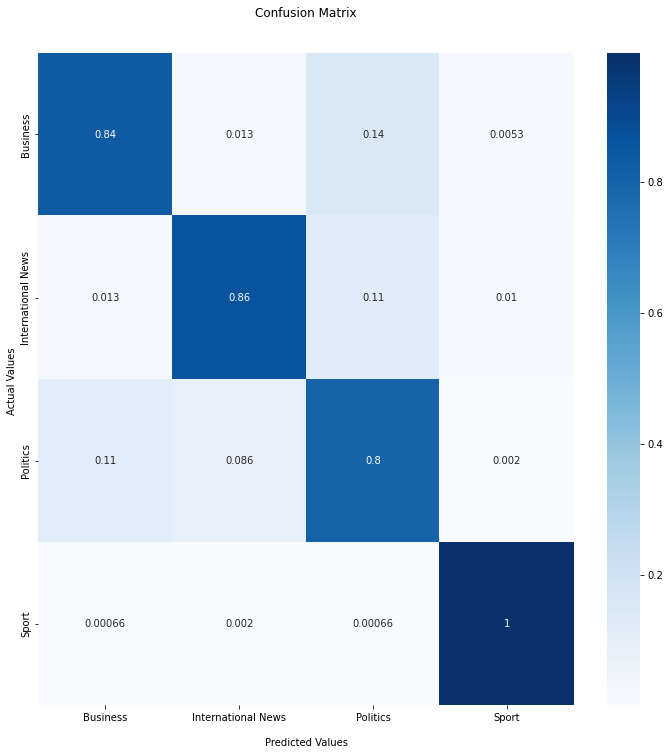

['Business', 'International News', 'Politics', 'Sport']


In [157]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,12))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1, keepdims=True), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(categories)
ax.yaxis.set_ticklabels(categories)

## Display the visualization of the Confusion Matrix.
plt.show()
print(categories)

In [159]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy : 0.8811475409836066
                    precision    recall  f1-score   support

          Business       0.78      0.84      0.81       759
International News       0.88      0.86      0.87      1148
          Politics       0.83      0.80      0.81      1466
             Sport       0.99      1.00      0.99      1507

          accuracy                           0.88      4880
         macro avg       0.87      0.87      0.87      4880
      weighted avg       0.88      0.88      0.88      4880



### Test Cases from DW Amharic

In [164]:
# https://www.dw.com/am/%E1%8B%A8%E1%8C%A5%E1%88%AD-15-%E1%89%80%E1%8A%95-2015-%E1%8B%93%E1%88%9D-%E1%8B%A8%E1%88%B5%E1%8D%96%E1%88%AD%E1%89%B5-%E1%8B%98%E1%8C%88%E1%89%A3/a-64491792
sport = '''በእንግሊዝ ፕሬሚየር ሊግ፦ እጅግ ውብ ፉክክር በታየበት የትናንቱ ግጥሚያ አርሰናል ማንቸስተር ዩናይትድን ድል በማድረግ በእርግጥም 
ዘንድሮ ዋንጫውን ለማንሳት የቆረጠ መሆኑን ዐሳይቷል። አንድ ተስተካካይ ጨዋታ እየቀረው ተከታዩ ማንቸስተር ሲቲን በአምስት ነጥቦች በልጧል። 
ኧርሊንግ ኦላንድ በዘንድሮ የጨዋታ ክፍለ ጊዜ ለማንቸስተር ሲቲ አራተኛ ሔትትሪኩን ሠርቷል። በርካታ ተጨዋቾቻቸው የተጎዱባቸው ቸልሲ እና ሊቨርፑል
 ድል ርቋቸው የደረጃ ሰንጠረዡ አማካይ ላይ እየተንገታገቱ ነው። በጀርመን ቡንደስሊጋ ቬርደር ብሬመን በኮሎኝ አይቀጡ ቅጣት ተቀጥቷል። 
 የኢትዮጵያ ብሔራዊ ቡድን ከቻን ፉክክር ተሰናብቷል። በዐለም የእጅ ኳስ ፉክክር የጀርመን ቡድን ወደ ሩብ ፍጻሜ ለማለፍ ዛሬ ማታ ወሳኝ 
 ግጥሚያውን ያደርጋል።'''

# https://www.dw.com/am/%E1%8B%A8%E1%8A%A2%E1%89%B5%E1%8B%AE%E1%8C%B5%E1%8B%AB-%E1%89%A5%E1%88%94%E1%88%AB%E1%8B%8A-%E1%89%A3%E1%8A%95%E1%8A%AD-%E1%8A%A0%E1%8B%B2%E1%88%B1-%E1%8C%88%E1%8B%A5-%E1%88%9B%E1%88%9E-%E1%88%9D%E1%8A%85%E1%88%A8%E1%89%B1-%E1%88%9D%E1%8A%95-%E1%8B%AD%E1%8C%A0%E1%89%A5%E1%89%83%E1%89%B8%E1%8B%8B%E1%88%8D/a-64514980
business = '''የ44 ዓመቱ ጎልማሳ ማሞ ምኅረቱ የኢትዮጵያን ብሔራዊ ባንክ ገዥ ቢሮ ሲረከቡ በዶክተር ይናገር ደሴ የአመራር ዘመን ከ30 በመቶ 
የተሻገረው የዋጋ ንረት መፍትሔ የሚሻ አንገብጋቢ ጉዳይ ሆኖ ይጠብቃቸዋል። የኢትዮጵያ ብሔራዊ ባንክ የዋጋ ግሽበቱን ወደ "ነጠላ አሐዝ የማውረድ" ዕቅድ 
ቢኖረውም ተሰናባቹ ገዥ ይናገር ደሴ ግን እስከ ሰኔ ባሉት ወራት ይሳካል የሚል እምነት የላቸውም።
የገንዘብ አስተዳደር ባለሙያው ዶክተር አብዱልመናን መሐመድ "የዋጋ ግሽበት እና ብር ከውጭ አገር ገንዘቦች ጋር" ሚዛኑን የጠበቀ የምንዛሪ ተመን እንዲኖረው 
ማድረግ  የብሔራዊው ባንክ አንገብጋቢ ጉዳዮች እንደሆኑ ይናገራሉ።

አቶ ማሞ በገዥነት የተሾሙለት የኢትዮጵያ ብሔራዊ ባንክ "ገንዘብ የማተምና የማሠራጨት፣ የሀገሪቱን የውጭ ምንዛሪ ማስተዳደር፣ የገንዘብ ፖሊሲ የማውጣትና 
የመተግበር፣ ለገንዘብ ድርጅቶች ፈቃድ መስጠትና መቆጣጠር" ላይ እንዲያተኩር ሆኖ የተቋቋመው በ1955 ነበር። የባንኩን ማቋቋሚያ አዋጆች በማሻሻል ደርግ እና
ኢሕአዴግ በተለያዩ ጊዜያት ይከተሏቸው ከነበሩ የፖለቲካ ፍልስፍናዎች የተጣጣመ ሚና እንዲኖረው ሊያደርጉ ሞክረዋል። የብሔራዊ ባንኩም ሆኑ የኢትዮጵያ ኤኮኖሚ 
ያሉባቸው ችግሮች ለረዥም ዓመታት ሲንከባለሉ የቆዩ እና በተለያዩ ምክንያቶች እየተወሳሰቡ የሔዱ ናቸው።'''

# https://www.dw.com/am/%E1%8C%80%E1%88%AD%E1%88%98%E1%8A%95-%E1%88%8A%E1%8B%AE%E1%8D%93%E1%88%AD%E1%8B%B5-2-%E1%89%B3%E1%8A%95%E1%8A%AE%E1%89%BD%E1%8A%95-%E1%88%88%E1%8B%A9%E1%8A%AD%E1%88%AC%E1%8A%95-%E1%88%88%E1%88%98%E1%88%B5%E1%8C%A0%E1%89%B5-%E1%8B%AB%E1%88%88%E1%88%98%E1%8B%89-%E1%88%B5%E1%89%A5%E1%88%B0%E1%89%A3/a-64473352
international = '''የሰሜን አትላንቲክ ቃል ኪዳን የኔቶ አባል ሀገራት የመከላከያ ሚንስትሮች እና ሌሎች ደጋፊ ሃገራት ለዩክሬን ጦር ሰራዊት ተጨማሪ ወታደራዊ 
ቁሳቁስ ለመስጠት በጀርመን በሚገኘው ራምሽታይን የዩናይትድ ስቴትስ የአየር ኃይል ሰፈር ለመወያየት ስብሰባ ተቀምጠዋል።  የስብሰባው ዋነኛ ርዕሰ ጉዳይ ሊዮፓርድ 2 
የተሰኘዉን የጀርመንን ታንኮች በሩሲያ ጥቃት ወደተሰነዘረባት አገር ለዩክሪይን ለመስጠት ነው። ወደ 50 አገሮች በሚካፈሉበት  በዚህ ስብሰባ ላይ የዩናይትድ ስቴትስ 
መከላከያ ሚኒስትር  ሎይድ ኦስቲን፣ አዲስ የተሾሙት  የጀርመን አቻቸዉ  ቦሪስ ፒስቶሪየስ እና የዩክሬን መከላከያ ሚኒስትር ኦሌክሲ ሬስኒኮፍ ይገኙበታል።

ይህ በእንዲህ እንዳለ፤ ጀርመን ሊዮፓርድ ሁለት የተሰኘዉን ታንኳን እንድትሰጥ ከዩክሬይን የሚገደረዉ ከፍተኛ ግፊት ከጊዜ ወደጊዜ እየጨመረ ነዉ።ሊዮፓርድ 2 የተባለዉ 
ታንክ ለዉግያ በጣም የሚመረጥ እና በብዛትም የሚገኝ መሆኑ ነዉ የተመለከተዉ። ጀርመን ይህን ዘመናዊ ታንኳን ለዩክሬይን ለመስጠት ማንገራገርዋ ታንኩን ከዚህ ቀደም 
ከጀርመን የገዙ ለዩክሬይን አሳልፈዉ እንዳይሰጡ የሚያግድ ነዉ ተብሏል። ታዋቂዉን ይህን ታንክ ለዩክሬይን እንዲሰጥ የሚደረገዉ ግፊት እና የጀርመን ማንገራገር ዛሬ 
ራምሽታይን ጀርመን የአሜሪካ ጦር ሰፍር ላይ እየተካሄደ በሚገኘዉ የመከላከያ ሚኒስትሮች እና ከፍተኛ የጦር መኮንኖች ስብሰባ ላይ ትልልቅ ርዕስ ሆንዋል። የዩናይትድ 
ስቴትስ መከላከያ ሚኒስትር ልዮድ አዉስቲን የሚመሩት በዚህ ስብሰባ ላይ ዩክሬይንን የሚደግፎ ተካፋዮች የተገኙበት  ሲሆን የዩናይትድ ስቴትሱ መከላከያ ሚኒስትር ሎይድ 
አዉስቲን እንደተናገሩት ምዕራባዉያኑ ተባባሪዎች ዩክሬንን ለመደገፍ ያቅማቸዉን ሁሉ ማድረግ አለባቸዉ ብለዋል።'''

# https://www.dw.com/am/%E1%8B%A8%E1%8A%A2%E1%89%B5%E1%8B%AE%E1%8C%B5%E1%8B%AB-%E1%88%85%E1%8C%88-%E1%88%98%E1%8A%95%E1%8C%8D%E1%88%B5%E1%89%B5-%E1%88%98%E1%88%BB%E1%88%BB%E1%88%8D-%E1%88%8B%E1%8B%AD-%E1%88%9D%E1%8A%AD%E1%8A%AD%E1%88%AD-%E1%88%88%E1%88%9B%E1%8B%B5%E1%88%A8%E1%8C%8D-%E1%8B%A8%E1%88%9A%E1%8B%AB%E1%88%B5%E1%89%BD%E1%88%8D-%E1%88%98%E1%8B%B5%E1%88%A8%E1%8A%AD-%E1%88%9B%E1%8B%98%E1%8C%8B%E1%8C%80%E1%89%B1%E1%8A%95/a-64545067
politics = '''የኢትዮጵያ ህገ መንግስት መሻሻል ላይ ምክክር ለማድረግ የሚያስችል መድረክ ማዘጋጀቱን የአሜሪካ ኢትዮጵያ የህዝብ ጉዳዮች ቋሚ ኮሚቴ-ኤፓክ አስታወቀ።
የኤፓክ ሊቀመንበር፣አቶ መስፍን ተገኑ በተለይ ለዶይቸ ቨለ እንደገለፁት፣የውይይት መድረኩ በውጭ የሚኖሩ ኢትዮጵያውያንና ትውልደ ኢትዮጵያዊያን፣ህገ መንግሥቱ እንዴት ይሻሻል 
በሚለው ዐሳብ ላይ ድምጽ እንዲኖራቸው ያስችላል።

አቶ መስፍን እንደሚሉት፣ የሚካሄደው ውይይት መድረክ፣በውጭ የሚኖሩ ኢትዮጵያውያንና ትውልድ ኢትዮጵያውያን በኢትዮጵያ ሊካሄድ በታቀደው ብሄራዊ ምክክር የመካፈል ዕድል 
እንዲያገኙ በሚል የተዘጋጀ ነው። "የዲያስፖራው ሚና ምድነው? ኢትዮጵያ አሜሪካውያን እንዲሁም፣በዓለም ላይ ያለው ጠቅላላው ኢትዮጵያዊ ሕዝብ ምንድነው ማበርከት ያለበት 
የሚለውን እና ያንንስ እንዴት ነዉ የሚያደርገዉ? የሚለው ነገር ካሰብንበት በኋላ፣ገንቢ በሆነ መንገድ ለምክክር ኮሚሽኑ የሚረዳ ስራ መስራት ይቻላል በሚል፣ያንንም በዚህ አጋጣሚ 
ዲያስፖራው በዓለም ላይ ያለውን ሐሳብ ያካተተ ጠቀም ያለ ሥራ ሰርቶ፣ ለምክክር ኮሚሽኑ በመላክ  ለሚያደርጉት ሥራ አስተዋጽኦ ይሰጣል በሚል እምነት የተጀመረ ነው።"'''

test = np.array([encode_text(clean_text(text), embeddings, 300) for text in [sport, business, international, politics]])
print("Predicted Labels :", [categories[i] for i in np.argmax(model.predict(test), axis=1)])

1/1 [==============================] - 0s 41ms/step
Predicted Labels : ['Sport', 'Business', 'International News', 'Politics']
